In [69]:
#Imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import f1_score
import seaborn as sns

In [70]:
#load data
df=pd.read_csv('Toddler Autism dataset July 2018.csv')
df2=df
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [71]:
#to check for duplicates
df.duplicated().sum()

0

In [72]:
#to check for missing values (luckily there's none)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [73]:
#drop columns that are not needed (case no & who completed the test)
df.drop(["Case_No","Who completed the test","Qchat-10-Score"], axis=1, inplace=True)
df.head(1)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,f,middle eastern,yes,no,No


In [74]:
#now we check for outliers (misspelling for example) (we find no outliers)
df['Jaundice'].unique()

array(['yes', 'no'], dtype=object)

In [75]:
df['Sex'].unique()

array(['f', 'm'], dtype=object)

In [76]:
df['Family_mem_with_ASD'].unique()
df['Family_mem_with_ASD'].value_counts()

no     884
yes    170
Name: Family_mem_with_ASD, dtype: int64

In [77]:
df['Class/ASD Traits '].unique()

array(['No', 'Yes'], dtype=object)

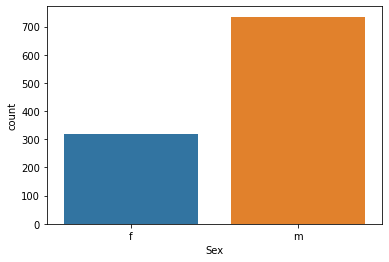

In [78]:
sns.countplot(x='Sex' , data=df)


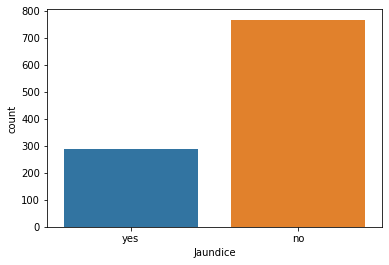

In [79]:
sns.countplot(x='Jaundice' , data=df)


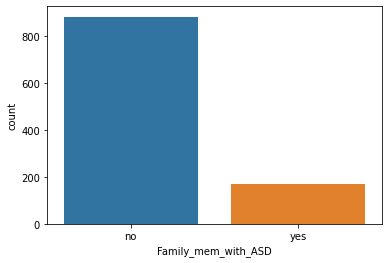

In [80]:
sns.countplot(x='Family_mem_with_ASD' , data=df)

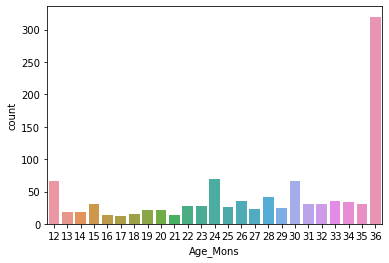

In [81]:
sns.countplot(x='Age_Mons' , data=df)


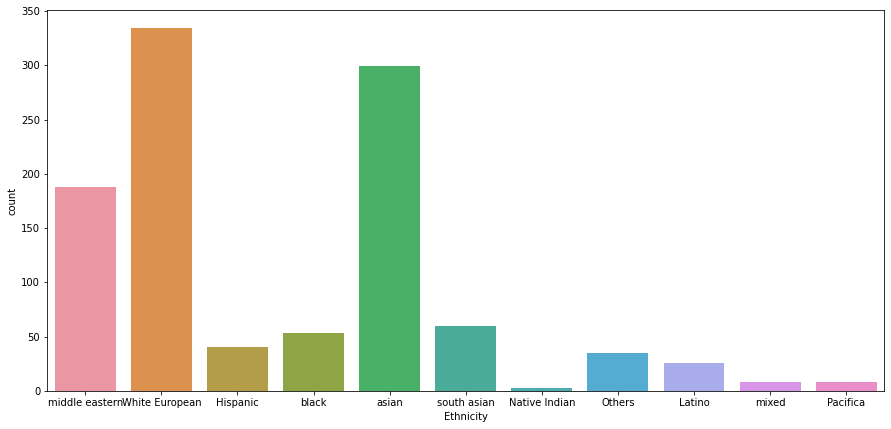

In [82]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.countplot(x='Ethnicity' , data=df2)


In [83]:
#replacing non intger values with intger 
#yes will be 1 , no will be 0,m will be 1 ,f will be 0
df["Jaundice"].replace({"no": 0, "yes": 1}, inplace=True)
df["Family_mem_with_ASD"].replace({"no": 0, "yes": 1}, inplace=True)
df["Sex"].replace({"f": 0, "m": 1}, inplace=True)

c=df.iloc[:,-1:]
c.replace({"No": 0, "Yes": 1}, inplace=True)
df.iloc[:,-1:]=c
#encoding ethinithy to be representive and binary
df = pd.get_dummies(df, columns = ['Ethnicity'])
df.columns


Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Sex', 'Jaundice', 'Family_mem_with_ASD', 'Class/ASD Traits ',
       'Ethnicity_Hispanic', 'Ethnicity_Latino', 'Ethnicity_Native Indian',
       'Ethnicity_Others', 'Ethnicity_Pacifica', 'Ethnicity_White European',
       'Ethnicity_asian', 'Ethnicity_black', 'Ethnicity_middle eastern',
       'Ethnicity_mixed', 'Ethnicity_south asian'],
      dtype='object')

In [84]:
#moving label to be last column
cols = df.columns.tolist()
temp=cols[14]
cols[14]=cols[-1]
cols[-1]=temp
df = df[cols]
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Ethnicity_Latino,Ethnicity_Native Indian,Ethnicity_Others,Ethnicity_Pacifica,Ethnicity_White European,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_mixed,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,1,0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,1,0,1
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
4,1,1,0,1,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,0,1


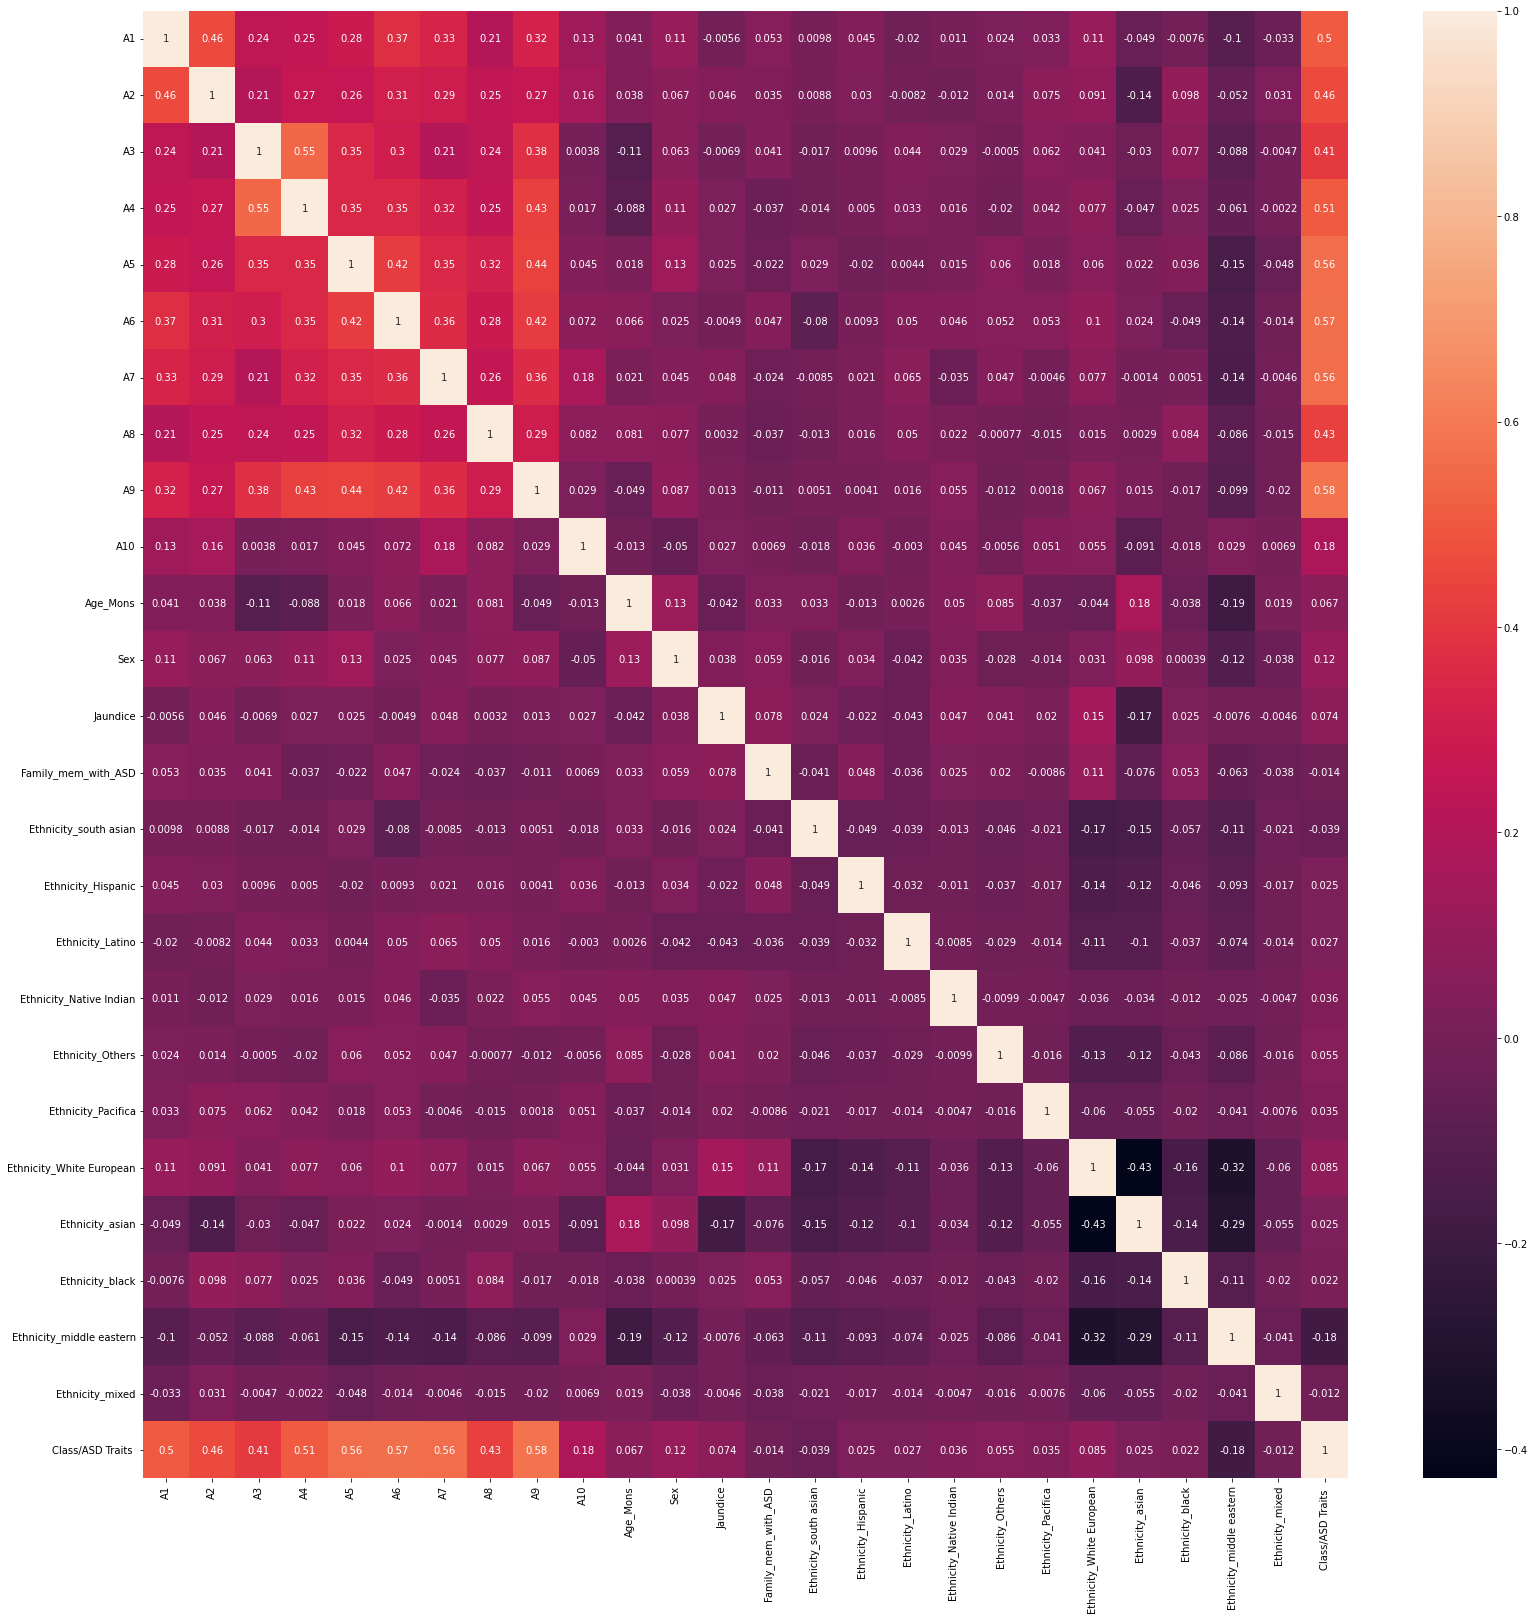

In [85]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(27, 27))
sns.heatmap(data = corr, annot = True, cbar = True)

In [86]:
#to insure no redundent info is given after dummy enocding we need to drop a 
#column from 11 , we chose to drop native indian
#we are putting featues in a list so we can chose what drop easily for testing
#perposes 
features=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Sex', 'Jaundice', 'Family_mem_with_ASD', 
       'Ethnicity_Hispanic', 'Ethnicity_Latino',
       'Ethnicity_Others', 'Ethnicity_Pacifica', 'Ethnicity_White European',
       'Ethnicity_asian', 'Ethnicity_black', 'Ethnicity_middle eastern',
       'Ethnicity_mixed', 'Ethnicity_south asian']
X=df[features]
y=df.iloc[:,-1:]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)


In [87]:
#log reg model
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train,y_train.values.ravel())
log_train=logreg.score(X_train,y_train)
log_test=logreg.score(X_test,y_test)
log_preds = logreg.predict(X_test)
print("CM:", confusion_matrix(y_test, log_preds))
print("log train score is:",log_train)
print("log test score is",log_test)


CM: [[ 94   1]
 [  1 221]]
log train score is: 0.9918588873812755
log test score is 0.9936908517350158


In [88]:
clf_svm = svm.SVC() 
clf_svm.fit(X_train, y_train.values.ravel())
svm_train=clf_svm.score(X_train,y_train)
svm_test=clf_svm.score(X_test,y_test)
svm_preds = clf_svm.predict(X_test)
print("CM:" ,confusion_matrix(y_test, svm_preds))
print("svm train score is:",svm_train,"svm test is",svm_test)


CM: [[ 39  56]
 [  1 221]]
svm train score is: 0.7964721845318861 svm test is 0.8201892744479495


In [89]:
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train,y_train)
tree_train=clf_tree.score(X_train,y_train)
tree_test=clf_tree.score(X_test,y_test)
tree_preds = clf_tree.predict(X_test)
print("CM:" ,confusion_matrix(y_test, tree_preds))
print("tree train score is:",tree_train)
print("tree test is",tree_test)


CM: [[ 85  10]
 [ 19 203]]
tree train score is: 1.0
tree test is 0.9085173501577287


In [90]:
gauss_model = GaussianNB()
#training
gauss_model.fit(X_train,y_train.values.ravel())
#scores
#training

nb_train=gauss_model.score(X_train,y_train)
#testing

nb_test=gauss_model.score(X_test,y_test)

#predicition
nb_preds=gauss_model.predict(X_test)
print("CM:" ,confusion_matrix(y_test, nb_preds))
print("nb train score is:",nb_train)
print("nb test is",nb_test)


CM: [[ 85  10]
 [ 10 212]]
nb train score is: 0.9430122116689281
nb test is 0.9369085173501577


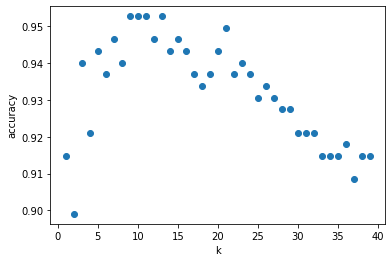

In [91]:
#Visualization
#to choose best k for knn
import matplotlib.pyplot as plt
%matplotlib inline

k_range = range(1,40)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train.values.ravel())
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20,25,30,35,40]);

In [92]:
#best k from above is around 10 
knn = KNeighborsClassifier(n_neighbors=10)
#training

knn.fit(X_train,y_train.values.ravel())
#scores
#training

knn_train=knn.score(X_train,y_train)
#testing

knn_test=knn.score(X_test,y_test)
#predict

knn_preds=knn.predict(X_test)

print("CM:" ,confusion_matrix(y_test, knn_preds))
print("knn train score is:",knn_train)
print("knn test is",knn_test)


CM: [[ 90   5]
 [ 10 212]]
knn train score is: 0.9497964721845319
knn test is 0.9526813880126183
